<a href="https://colab.research.google.com/github/Janina712/PUS2024_JBoecher/blob/main/MissingData_10_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

In [3]:
student_results = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2024/refs/heads/main/data/StudentPerformanceFactors_modified.csv")

**Explore dataset**

In [4]:
student_results.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84.0,Low,High,No,7.0,73.0,Low,Yes,0.0,Low,Medium,Public,Positive,3.0,No,High School,Near,Male,67.0
1,19.0,64.0,Low,Medium,No,8.0,59.0,Low,Yes,2.0,Medium,Medium,Public,Negative,4.0,No,College,Moderate,Female,61.0
2,24.0,98.0,Medium,Medium,Yes,7.0,91.0,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4.0,No,Postgraduate,Near,Male,74.0
3,29.0,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1.0,Medium,Medium,Public,Negative,4.0,No,High School,Moderate,Male,71.0
4,NaN,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3.0,Medium,High,Public,Neutral,4.0,No,College,Near,Female,70.0


In [9]:
student_results.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25.0,69.0,High,Medium,No,7.0,76.0,Medium,Yes,1.0,High,Medium,Public,Positive,2.0,No,High School,Near,Female,68.0
6603,23.0,76.0,High,Medium,No,8.0,81.0,Medium,Yes,3.0,Low,High,Public,Positive,2.0,No,High School,Near,Female,69.0
6604,NaN,90.0,Medium,Low,Yes,6.0,65.0,Low,Yes,3.0,Low,Medium,Public,Negative,2.0,No,Postgraduate,Near,Female,68.0
6605,10.0,86.0,High,High,Yes,6.0,91.0,High,Yes,2.0,Low,Medium,Private,Positive,3.0,No,High School,Far,Female,68.0
6606,15.0,67.0,Medium,Low,Yes,9.0,94.0,Medium,Yes,0.0,Medium,Medium,Public,Positive,4.0,No,Postgraduate,Near,Male,64.0


In [5]:
student_results.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6527.000000,6521.000000,6526.000000,6528.000000,6523.000000,6518.000000,6525.000000
mean,19.984832,79.990799,7.028042,75.067096,1.493791,2.966247,67.240307
std,5.993324,11.546369,1.469583,14.397116,1.231580,1.031094,3.882296
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


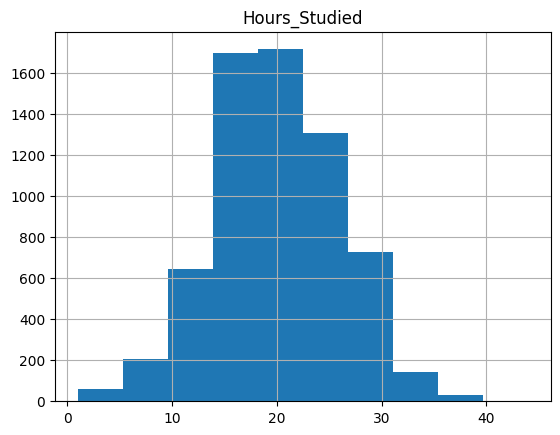

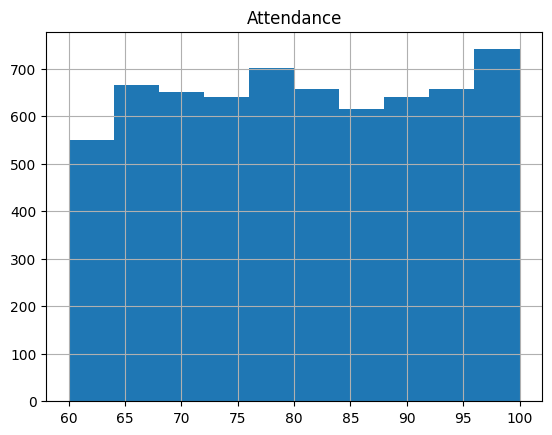

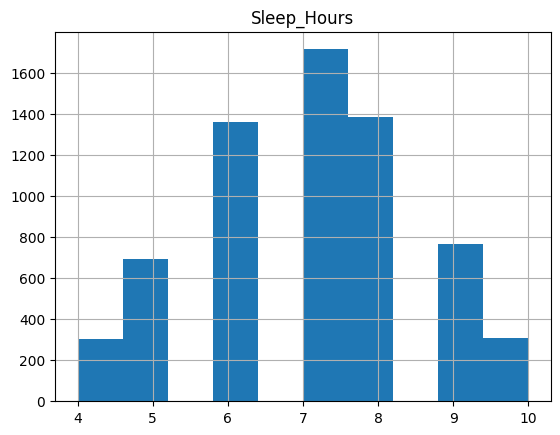

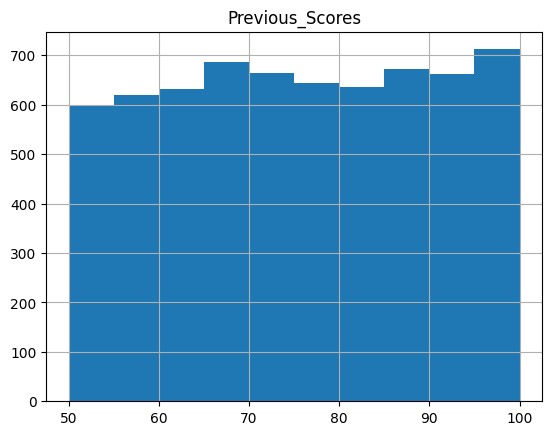

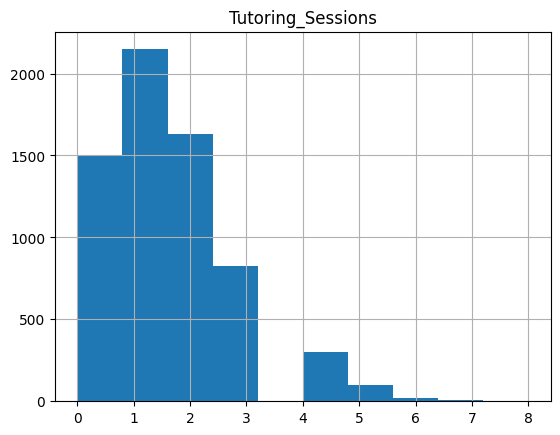

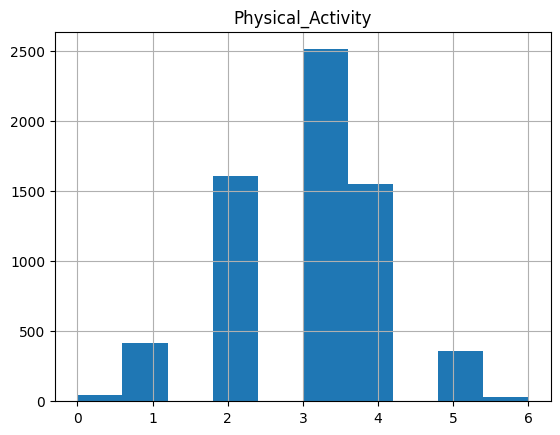

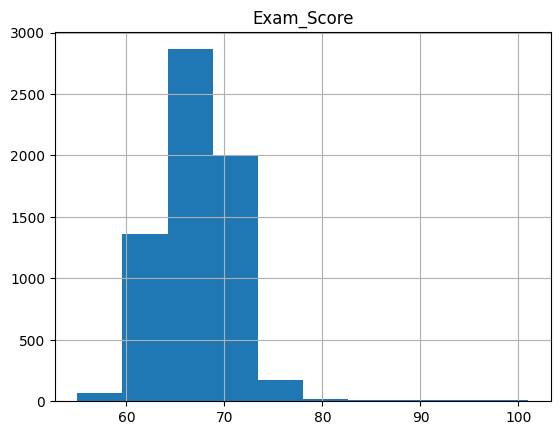

In [18]:
for c in student_results.select_dtypes("number").columns:
  student_results[[c]].hist()

In [7]:
student_results.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [8]:
student_results.shape

(6607, 20)

**Deal with categorical data**

In [12]:
# turn categorical values into numerical (dummies)
categorical = pd.get_dummies(student_results["Parental_Involvement"])

In [15]:
merged_df = student_results.merge(categorical, left_index = True, right_index = True).drop(columns="Parental_Involvement")

In [16]:
merged_df

,Hours_Studied,Attendance,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,High,Low,Medium
0,23.0,84.0,High,No,7.0,73.0,Low,Yes,0.0,Low,...,Positive,3.0,No,High School,Near,Male,67.0,False,True,False
1,19.0,64.0,Medium,No,8.0,59.0,Low,Yes,2.0,Medium,...,Negative,4.0,No,College,Moderate,Female,61.0,False,True,False
2,24.0,98.0,Medium,Yes,7.0,91.0,Medium,Yes,2.0,Medium,...,Neutral,4.0,No,Postgraduate,Near,Male,74.0,False,False,True
3,29.0,89.0,Medium,Yes,8.0,98.0,Medium,Yes,1.0,Medium,...,Negative,4.0,No,High School,Moderate,Male,71.0,False,True,False
4,NaN,92.0,Medium,Yes,6.0,65.0,Medium,Yes,3.0,Medium,...,Neutral,4.0,No,College,Near,Female,70.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69.0,Medium,No,7.0,76.0,Medium,Yes,1.0,High,...,Positive,2.0,No,High School,Near,Female,68.0,True,False,False
6603,23.0,76.0,Medium,No,8.0,81.0,Medium,Yes,3.0,Low,...,Positive,2.0,No,High School,Near,Female,69.0,True,False,False
6604,NaN,90.0,Low,Yes,6.0,65.0,Low,Yes,3.0,Low,...,Negative,2.0,No,Postgraduate,Near,Female,68.0,False,False,True
6605,10.0,86.0,High,Yes,6.0,91.0,High,Yes,2.0,Low,...,Positive,3.0,No,High School,Far,Female,68.0,True,False,False


**Deal with missing data**

In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6527 non-null   float64
 1   Attendance                  6521 non-null   float64
 2   Access_to_Resources         6607 non-null   object 
 3   Extracurricular_Activities  6607 non-null   object 
 4   Sleep_Hours                 6526 non-null   float64
 5   Previous_Scores             6528 non-null   float64
 6   Motivation_Level            6607 non-null   object 
 7   Internet_Access             6607 non-null   object 
 8   Tutoring_Sessions           6523 non-null   float64
 9   Family_Income               6607 non-null   object 
 10  Teacher_Quality             6529 non-null   object 
 11  School_Type                 6607 non-null   object 
 12  Peer_Influence              6607 non-null   object 
 13  Physical_Activity           6518 

In [21]:
merged_df.isna().sum()

,0
Hours_Studied,80
Attendance,86
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,81
Previous_Scores,79
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,84
Family_Income,0


<Axes: >

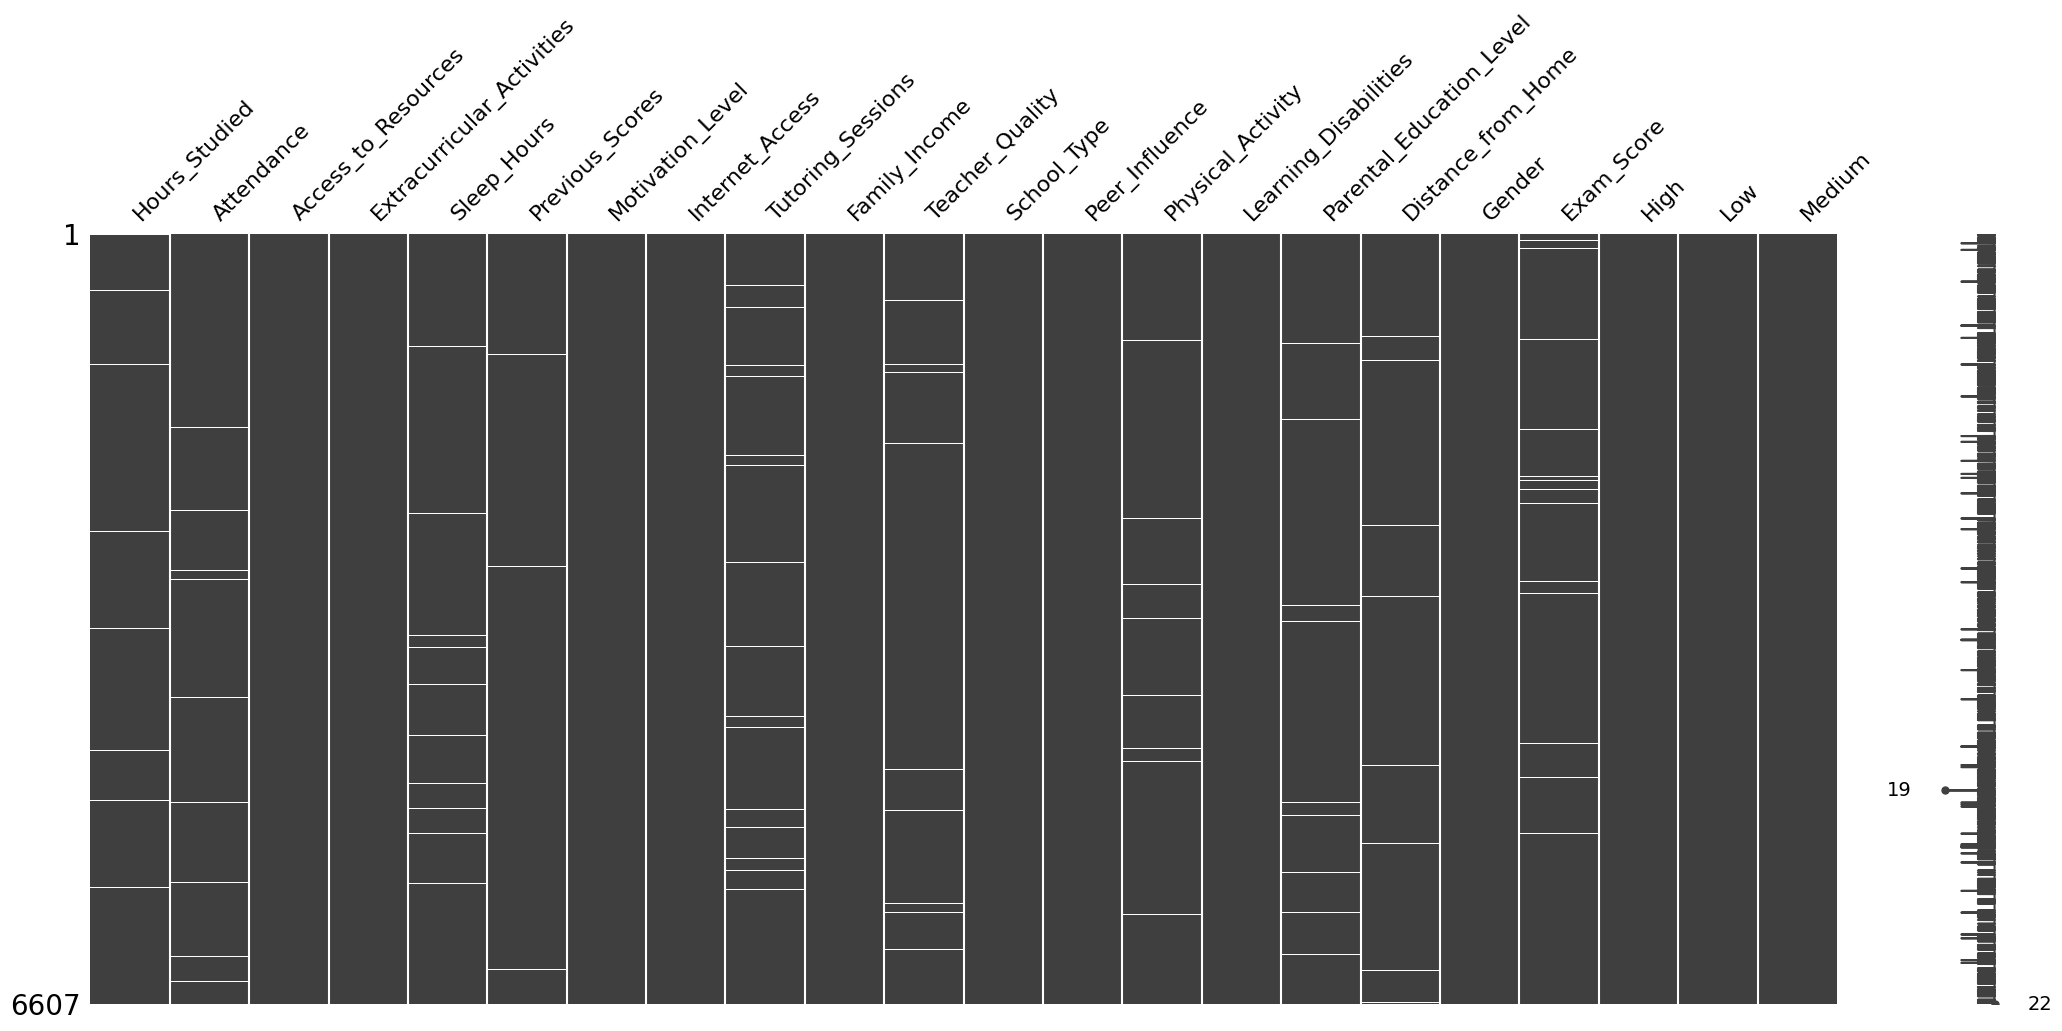

In [22]:
import missingno as msno
msno.matrix(merged_df)

In [ ]:
# missing (completely) at random vs. not at random

In [23]:
# drop rows with missing data
merged_df.dropna(axis=0)

,Hours_Studied,Attendance,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,High,Low,Medium
0,23.0,84.0,High,No,7.0,73.0,Low,Yes,0.0,Low,...,Positive,3.0,No,High School,Near,Male,67.0,False,True,False
1,19.0,64.0,Medium,No,8.0,59.0,Low,Yes,2.0,Medium,...,Negative,4.0,No,College,Moderate,Female,61.0,False,True,False
2,24.0,98.0,Medium,Yes,7.0,91.0,Medium,Yes,2.0,Medium,...,Neutral,4.0,No,Postgraduate,Near,Male,74.0,False,False,True
3,29.0,89.0,Medium,Yes,8.0,98.0,Medium,Yes,1.0,Medium,...,Negative,4.0,No,High School,Moderate,Male,71.0,False,True,False
5,19.0,88.0,Medium,Yes,8.0,89.0,Medium,Yes,3.0,Medium,...,Positive,3.0,No,Postgraduate,Near,Male,71.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,12.0,98.0,Low,Yes,4.0,54.0,Medium,Yes,2.0,Medium,...,Neutral,3.0,No,High School,Near,Female,67.0,False,False,True
6602,25.0,69.0,Medium,No,7.0,76.0,Medium,Yes,1.0,High,...,Positive,2.0,No,High School,Near,Female,68.0,True,False,False
6603,23.0,76.0,Medium,No,8.0,81.0,Medium,Yes,3.0,Low,...,Positive,2.0,No,High School,Near,Female,69.0,True,False,False
6605,10.0,86.0,High,Yes,6.0,91.0,High,Yes,2.0,Low,...,Positive,3.0,No,High School,Far,Female,68.0,True,False,False


In [26]:
# replace missing data with mean of column
merged_df["Hours_Studied"].fillna(merged_df["Hours_Studied"].mean())

,Hours_Studied
0,23.000000
1,19.000000
2,24.000000
3,29.000000
4,19.984832
...,...
6602,25.000000
6603,23.000000
6604,19.984832
6605,10.000000


In [42]:
import numpy as np
np.random.seed(94)
data = np.random.randn(1000)
print('mean: {:.2} std {:.2}'.format(data.mean(), data.std()))

mean: 0.005 std 0.98


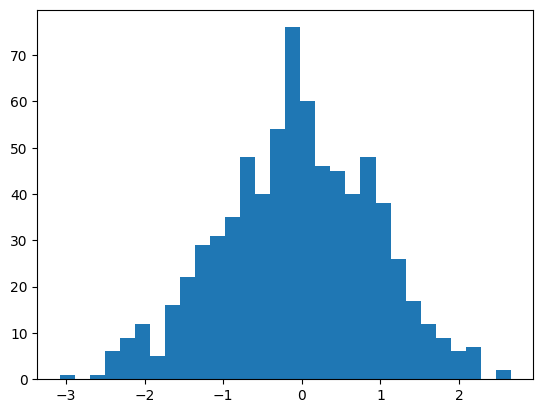

In [40]:
import matplotlib.pyplot as plt
plt.hist(data,bins=30);

Text(0, 0.5, "['y']")

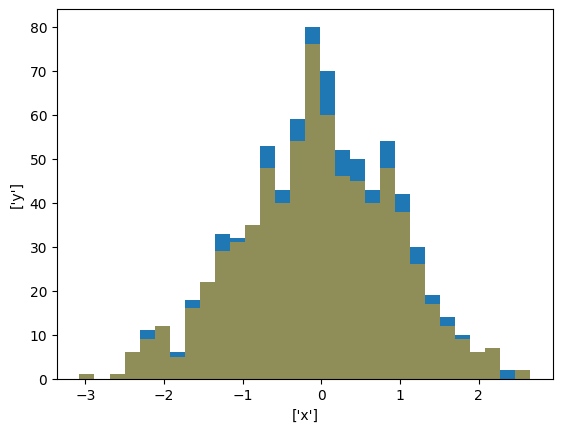

In [37]:
indeces = np.random.randint(0,1000,100)
data_nan = data.copy()
data[indeces] = np.nan
plt.hist(data_nan, bins=30)
plt.hist(data, bins=30, color = 'orange', alpha = 0.5)
plt.xlabel(["x"])
plt.ylabel(['y'])

In [38]:
# replace missing data with mean
mean_replace = np.nanmean(data_nan)
data_filled = data_nan.copy()
data_filled[np.isnan(data_filled)] = mean_replace

Text(0, 0.5, "['y']")

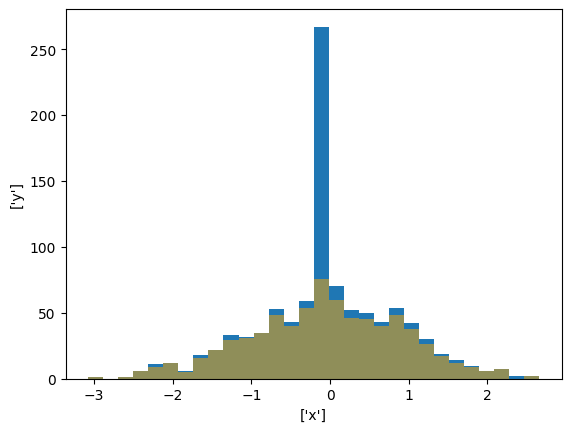

In [39]:
plt.hist(data_filled, bins=30)
plt.hist(data, bins=30, color = 'orange', alpha = 0.5)
plt.xlabel(["x"])
plt.ylabel(['y'])

In [ ]:
# replace missing data with k-nearest neighbor